# Experiment 1

Model: **XGBoost** 

Feature in: 
- Year
- Month
- 12 Lags

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import xgboost as xgb

from sktime.split import temporal_train_test_split
from sktime.forecasting.compose import make_reduction
from sktime.utils.plotting import plot_series
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [58]:
data = pd.read_csv('../../data/data.csv', parse_dates=['date'], index_col='date', dayfirst=True)
data.dropna(inplace=True)
data.columns = ['consumption']
data

,consumption
date,
2004-01-01,26978358.02
2004-02-01,26508170.77
2004-03-01,27284329.41
2004-04-01,28046182.35
2004-05-01,27244506.48
...,...
2023-08-01,43431147.92
2023-09-01,44477536.50
2023-10-01,46075109.58


In [59]:
y_train, y_test = temporal_train_test_split(data, test_size=12)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='consumption'>)

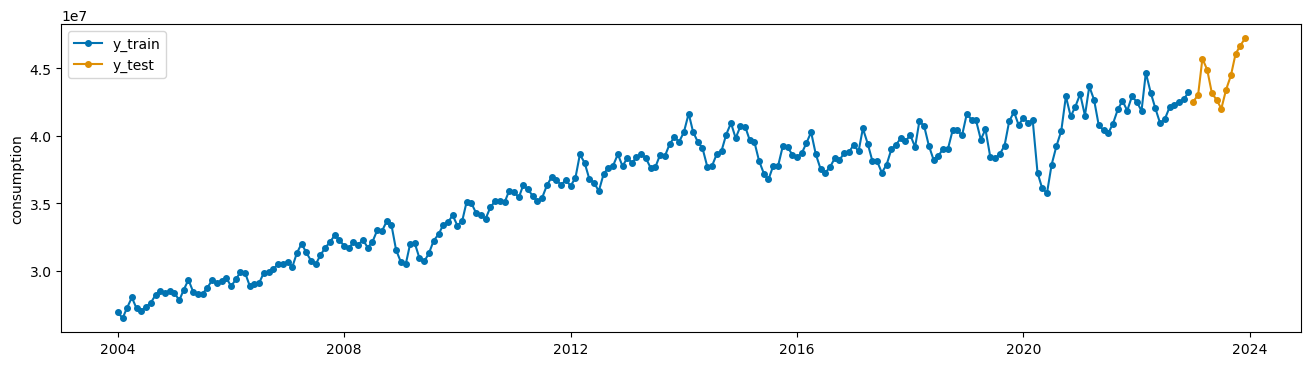

In [60]:
plot_series(y_train.sort_index(), y_test.sort_index(), labels=['y_train', 'y_test'])

In [61]:
y_train['month'] = y_train.index.month
y_train['year'] = y_train.index.year
y_test['month'] = y_test.index.month
y_test['year'] = y_test.index.year

C:\Users\axio\AppData\Local\Temp\ipykernel_22568\828646388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['month'] = y_train.index.month
C:\Users\axio\AppData\Local\Temp\ipykernel_22568\828646388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train['year'] = y_train.index.year
C:\Users\axio\AppData\Local\Temp\ipykernel_22568\828646388.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [77]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='recursive')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13))

print('Metode Recursive tanpa Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption']*100)

Metode Recursive tanpa Exogenous Variable
2023-01-01    0.324461
2023-02-01    1.307690
2023-03-01    4.355428
2023-04-01    3.867085
2023-05-01    0.628775
2023-06-01    1.410447
2023-07-01    1.477621
2023-08-01    1.913751
2023-09-01    5.448001
2023-10-01    8.734559
2023-11-01    8.392359
2023-12-01    9.432729
Freq: MS, Name: consumption, dtype: float64


In [79]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='recursive')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13), X=y_train.drop(columns='consumption'), X_pred=y_test.drop(columns='consumption'))

print('Metode Recursive dengan Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption'] * 100)

Metode Recursive dengan Exogenous Variable
2023-01-01     0.161862
2023-02-01     1.609708
2023-03-01     5.100485
2023-04-01     3.787361
2023-05-01     0.514830
2023-06-01     2.512082
2023-07-01     1.184924
2023-08-01     2.516157
2023-09-01     5.835972
2023-10-01     7.630041
2023-11-01     7.983319
2023-12-01    10.002160
Freq: MS, Name: consumption, dtype: float64


In [80]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='direct')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13))

print('Metode direct tanpa Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption'] * 100)

Metode direct tanpa Exogenous Variable
date
2023-01-01    1.091091
2023-02-01    0.815516
2023-03-01    5.814932
2023-04-01    2.391365
2023-05-01    1.023559
2023-06-01    1.671425
2023-07-01    2.074821
2023-08-01    2.110034
2023-09-01    4.049056
2023-10-01    7.817005
2023-11-01    8.742480
2023-12-01    9.851175
Freq: MS, Name: consumption, dtype: float64


In [81]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='direct')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13), X=y_train.drop(columns='consumption'), X_pred=y_test.drop(columns='consumption'))

print('Metode direct dengan Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption']* 100)

Metode direct dengan Exogenous Variable
date
2023-01-01    0.495388
2023-02-01    0.824758
2023-03-01    6.707678
2023-04-01    3.165799
2023-05-01    1.839824
2023-06-01    2.628487
2023-07-01    1.546238
2023-08-01    3.371967
2023-09-01    4.518642
2023-10-01    7.703625
2023-11-01    7.935411
2023-12-01    9.339910
Freq: MS, Name: consumption, dtype: float64


In [87]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='dirrec')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13))

print('Metode dirrec tanpa Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption']* 100)

Metode dirrec tanpa Exogenous Variable
2023-01-01    1.091091
2023-02-01    0.831741
2023-03-01    6.184758
2023-04-01    2.750586
2023-05-01    0.946153
2023-06-01    0.276209
2023-07-01    2.320706
2023-08-01    2.487367
2023-09-01    5.618613
2023-10-01    8.329047
2023-11-01    8.715437
2023-12-01    9.636518
Freq: MS, Name: consumption, dtype: float64


In [88]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='dirrec')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13), X=y_train.drop(columns='consumption'), X_pred=y_test.drop(columns='consumption'))

print('Metode dirrec dengan Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption']* 100)

Metode dirrec dengan Exogenous Variable
2023-01-01    1.091091
2023-02-01    0.831741
2023-03-01    6.184758
2023-04-01    2.750586
2023-05-01    0.946153
2023-06-01    0.276209
2023-07-01    2.320706
2023-08-01    2.487367
2023-09-01    5.618613
2023-10-01    8.329047
2023-11-01    8.715437
2023-12-01    9.636518
Freq: MS, Name: consumption, dtype: float64


In [86]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='multioutput')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13))

print('Metode multioutput tanpa Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption']* 100)

Metode multioutput tanpa Exogenous Variable
2023-01-01    0.865440
2023-02-01    1.224978
2023-03-01    5.799535
2023-04-01    1.948152
2023-05-01    0.161210
2023-06-01    1.908775
2023-07-01    1.803154
2023-08-01    2.484567
2023-09-01    4.888114
2023-10-01    7.469025
2023-11-01    9.845180
2023-12-01    9.645937
Freq: MS, Name: consumption, dtype: float64


In [85]:
regressor = xgb.XGBRegressor(random_state=42, eval_metric='mape')
forecaster = make_reduction(regressor, window_length=12, strategy='multioutput')
prediction = forecaster.fit_predict(y_train['consumption'], fh=np.arange(1, 13), X=y_train.drop(columns='consumption'), X_pred=y_test.drop(columns='consumption'))

print('Metode multioutput dengan Exogenous Variable')
print(np.abs(prediction - y_test['consumption'])/y_test['consumption']* 100)

Metode multioutput dengan Exogenous Variable
2023-01-01    0.259160
2023-02-01    1.474631
2023-03-01    6.074380
2023-04-01    2.925531
2023-05-01    1.643591
2023-06-01    2.555356
2023-07-01    1.518277
2023-08-01    3.500170
2023-09-01    4.725083
2023-10-01    7.895659
2023-11-01    9.102352
2023-12-01    8.652249
Freq: MS, Name: consumption, dtype: float64
